## Putting it all together

In [1]:
import seaborn as sns; sns.set_style("dark")
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler, Normalizer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import janitor
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNetCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import janitor

In [2]:
data = pd.read_csv("data/bankchurnersuse.csv").clean_names()

In [3]:
data

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [4]:
train, test = train_test_split(data, random_state = 10, train_size = 0.8, stratify = data["attrition_flag"])
train, test_init = train_test_split(train, random_state = 10, train_size = 0.8, stratify = train["attrition_flag"])

In [5]:
train.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
2147,770882508,Existing Customer,38,M,2,College,Married,$80K - $120K,Blue,24,...,1,5,17162.0,773,16389.0,1.238,2457,54,1.000,0.045
7967,712200033,Existing Customer,44,F,4,High School,Single,Less than $40K,Blue,36,...,3,3,3024.0,0,3024.0,0.750,4983,78,0.733,0.000
9892,806917983,Existing Customer,32,F,2,Graduate,Divorced,Unknown,Silver,27,...,3,1,33779.0,1526,32253.0,0.879,15200,126,0.800,0.045
7983,715463133,Existing Customer,40,M,5,High School,Single,$120K +,Blue,31,...,1,3,34516.0,1427,33089.0,0.706,3699,64,0.488,0.041
5638,711824358,Existing Customer,44,F,4,College,Single,Less than $40K,Blue,31,...,3,2,3228.0,0,3228.0,0.747,4524,70,0.667,0.000


In [6]:
test.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
3933,815240358,Existing Customer,47,F,3,Uneducated,Married,Unknown,Blue,42,...,1,4,25027.0,1501,23526.0,1.063,3357,62,0.771,0.060
2790,779284833,Existing Customer,55,M,2,Post-Graduate,Single,$60K - $80K,Blue,37,...,3,1,22127.0,1799,20328.0,0.758,3591,63,0.750,0.081
8663,719658858,Existing Customer,50,F,4,Doctorate,Married,Unknown,Silver,36,...,2,1,34516.0,2096,32420.0,0.666,7042,73,0.553,0.061
731,719459358,Existing Customer,52,M,1,Doctorate,Married,$120K +,Blue,41,...,2,2,33864.0,989,32875.0,1.219,1751,48,0.920,0.029
3335,734924658,Existing Customer,47,F,5,High School,Married,Less than $40K,Blue,36,...,3,1,1478.0,792,686.0,0.873,4123,67,0.489,0.536


### Hardcoded Feature Engineering

In [7]:
train["revolving_trans"] = train["total_revolving_bal"]/train["total_trans_amt"]
test_init["revolving_trans"] = test_init["total_revolving_bal"]/test_init["total_trans_amt"]
test["revolving_trans"] = test["total_revolving_bal"]/test["total_trans_amt"]

In [8]:
train["marriage_education"] = train["marital_status"] + "_" + train["education_level"]
test_init["marriage_education"] = test_init["marital_status"] + "_" + test_init["education_level"]
test["marriage_education"] = test["marital_status"] + "_" + test["education_level"]

In [9]:
train["attrition_flag"] = train["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)
test["attrition_flag"] = test["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)
test_init["attrition_flag"] = test_init["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)

### Data deduplication

In [10]:
train_0 = train[train["attrition_flag"] == 0]
train_0.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
2147,770882508,0,38,M,2,College,Married,$80K - $120K,Blue,24,...,17162.0,773,16389.0,1.238,2457,54,1.000,0.045,0.314611,Married_College
7967,712200033,0,44,F,4,High School,Single,Less than $40K,Blue,36,...,3024.0,0,3024.0,0.750,4983,78,0.733,0.000,0.000000,Single_High School
9892,806917983,0,32,F,2,Graduate,Divorced,Unknown,Silver,27,...,33779.0,1526,32253.0,0.879,15200,126,0.800,0.045,0.100395,Divorced_Graduate
7983,715463133,0,40,M,5,High School,Single,$120K +,Blue,31,...,34516.0,1427,33089.0,0.706,3699,64,0.488,0.041,0.385780,Single_High School
5638,711824358,0,44,F,4,College,Single,Less than $40K,Blue,31,...,3228.0,0,3228.0,0.747,4524,70,0.667,0.000,0.000000,Single_College


In [11]:
train_1 = train[train["attrition_flag"] == 1]
train_1.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
5562,787665258,1,47,F,3,Unknown,Married,Less than $40K,Blue,37,...,1438.3,0,1438.3,0.749,2393,36,0.636,0.0,0.0,Married_Unknown
6731,711122958,1,41,F,3,Graduate,Single,Less than $40K,Blue,33,...,1764.0,0,1764.0,0.552,2105,57,0.839,0.0,0.0,Single_Graduate
2174,712551258,1,39,M,1,Uneducated,Married,Less than $40K,Blue,36,...,4247.0,0,4247.0,0.405,847,17,0.133,0.0,0.0,Married_Uneducated
7973,820694133,1,60,F,0,High School,Married,Unknown,Blue,55,...,5549.0,0,5549.0,0.703,2412,38,0.520,0.0,0.0,Married_High School
2284,710586483,1,26,F,0,High School,Single,Unknown,Blue,13,...,6152.0,0,6152.0,0.391,968,23,0.533,0.0,0.0,Single_High School


In [12]:
train_0 = train_0.drop_duplicates()

### Class balancing

In [13]:
rand_list = list(np.random.randint(0, len(train_0), len(train_1)))

In [14]:
train_0 = train_0.iloc[rand_list,]
train_0.shape

(1041, 23)

In [15]:
train_new = pd.concat([train_0, train_1], axis = 0)
train_new.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
595,713490483,0,61,M,0,Uneducated,Single,$80K - $120K,Blue,48,...,21740.0,0,21740.0,0.676,1755,54,0.543,0.000,0.000000,Single_Uneducated
422,719337408,0,63,M,0,High School,Married,$60K - $80K,Blue,36,...,2567.0,0,2567.0,1.636,2399,43,0.955,0.000,0.000000,Married_High School
2521,709897983,0,35,F,2,Doctorate,Married,$40K - $60K,Blue,24,...,2655.0,1527,1128.0,0.715,1921,26,0.444,0.575,0.794898,Married_Doctorate
6096,714990633,0,56,M,4,Graduate,Single,$80K - $120K,Blue,36,...,2078.0,1696,382.0,0.562,4382,82,0.783,0.816,0.387038,Single_Graduate
5532,772063308,0,45,M,2,Graduate,Single,$60K - $80K,Blue,34,...,13362.0,0,13362.0,0.682,4155,79,0.795,0.000,0.000000,Single_Graduate


### Splitting into independent and dependent variables

In [16]:
x_train, y_train = train_new.drop(['attrition_flag','gender','clientnum'], axis = 1), train_new["attrition_flag"]

In [17]:
x_test, y_test = test.drop(['attrition_flag','gender','clientnum'], axis = 1), test["attrition_flag"]

In [18]:
x_test_init, y_test_init = test_init.drop(['attrition_flag','gender','clientnum'], axis = 1), test_init["attrition_flag"]

### Gathering categorical and numerical columns

In [19]:
num = []
cat = []
columns = list(x_train.columns)
for col in columns:
    if is_numeric_dtype(x_train[col]):
        num.append(col)
    elif is_string_dtype(x_train[col]):
        cat.append(col)

In [20]:
num

['customer_age',
 'dependent_count',
 'months_on_book',
 'total_relationship_count',
 'months_inactive_12_mon',
 'contacts_count_12_mon',
 'credit_limit',
 'total_revolving_bal',
 'avg_open_to_buy',
 'total_amt_chng_q4_q1',
 'total_trans_amt',
 'total_trans_ct',
 'total_ct_chng_q4_q1',
 'avg_utilization_ratio',
 'revolving_trans']

### Preprocessing tools

In [21]:
one_hot = OneHotEncoder()
min_max = MinMaxScaler()
sd = StandardScaler()
le = LabelEncoder()

In [22]:
ct = ColumnTransformer([("one_hot", one_hot, cat), ("min_max", min_max, num)])

### Pipeline Creation

In [23]:
pipeline = Pipeline([("ct", ct), ("dc", DecisionTreeClassifier())])

### Grid Search

In [24]:
param_grid = [{"dc__max_features":[10,20,30,40], "dc__max_depth": [9,12,15,18]}]

In [25]:
random_search = RandomizedSearchCV(pipeline, param_grid, cv = 5, n_iter=20)

In [26]:
random_search.fit(x_train, y_train)

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ct',
                                              ColumnTransformer(transformers=[('one_hot',
                                                                               OneHotEncoder(),
                                                                               ['education_level',
                                                                                'marital_status',
                                                                                'income_category',
                                                                                'card_category',
                                                                                'marriage_education']),
                                                                              ('min_max',
                                                                               MinMaxScaler(),
                                                       

In [27]:
random_search.best_params_

{'dc__max_features': 40, 'dc__max_depth': 18}

In [28]:
random_search.best_score_

0.9111441615938018

In [29]:
model = random_search.best_estimator_

### Cross Validation via pipeline

In [30]:
cross_val_score(model, x_train, y_train, cv = 5, scoring = "precision")

array([0.86111111, 0.88942308, 0.88584475, 0.89855072, 0.94059406])

### Fitting pipeline on training data

In [31]:
model.fit(x_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  ['education_level',
                                                   'marital_status',
                                                   'income_category',
                                                   'card_category',
                                                   'marriage_education']),
                                                 ('min_max', MinMaxScaler(),
                                                  ['customer_age',
                                                   'dependent_count',
                                                   'months_on_book',
                                                   'total_relationship_count',
                                                   'months_inactive_12_mon',
                                                   'contacts_count_12_mon',
                                

### Evaluating pipeline's accuracy

#### Training data results

In [32]:
from sklearn.model_selection import cross_val_predict
pred_train = cross_val_predict(model, x_train, y_train, cv = 5)
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1041
           1       0.90      0.89      0.90      1041

    accuracy                           0.90      2082
   macro avg       0.90      0.90      0.90      2082
weighted avg       0.90      0.90      0.90      2082



<AxesSubplot:>

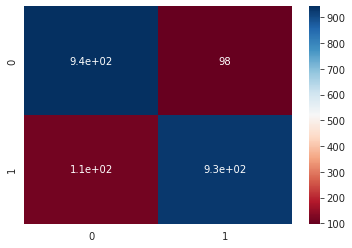

In [33]:
conf = confusion_matrix(y_train, pred_train)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [34]:
train_new["prediction"] = pred_train
train_probs = model.predict_proba(x_train)
train_new["prob_0"], train_new["prob_1"] = train_probs[:,0], train_probs[:,1]
train_new.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education,prediction,prob_0,prob_1
595,713490483,0,61,M,0,Uneducated,Single,$80K - $120K,Blue,48,...,0.676,1755,54,0.543,0.000,0.000000,Single_Uneducated,0,1.0,0.0
422,719337408,0,63,M,0,High School,Married,$60K - $80K,Blue,36,...,1.636,2399,43,0.955,0.000,0.000000,Married_High School,0,1.0,0.0
2521,709897983,0,35,F,2,Doctorate,Married,$40K - $60K,Blue,24,...,0.715,1921,26,0.444,0.575,0.794898,Married_Doctorate,1,1.0,0.0
6096,714990633,0,56,M,4,Graduate,Single,$80K - $120K,Blue,36,...,0.562,4382,82,0.783,0.816,0.387038,Single_Graduate,0,1.0,0.0
5532,772063308,0,45,M,2,Graduate,Single,$60K - $80K,Blue,34,...,0.682,4155,79,0.795,0.000,0.000000,Single_Graduate,0,1.0,0.0


#### Initial test data results

In [35]:
pred_test_init = model.predict(x_test_init)
print(classification_report(y_test_init, pred_test_init))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1360
           1       0.60      0.85      0.70       261

    accuracy                           0.89      1621
   macro avg       0.79      0.87      0.82      1621
weighted avg       0.91      0.89      0.89      1621



<AxesSubplot:>

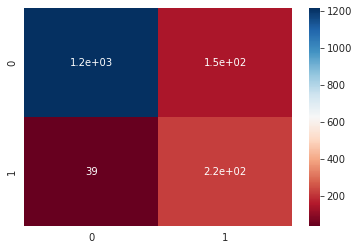

In [36]:
conf = confusion_matrix(y_test_init, pred_test_init)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [37]:
test_init["prediction"] = pred_test_init
test_init_probs = model.predict_proba(x_test_init)
test_init["prob_0"], test_init["prob_1"] = test_init_probs[:,0], test_init_probs[:,1]
test_init.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education,prediction,prob_0,prob_1
2447,712040433,0,54,F,1,High School,Married,Less than $40K,Blue,43,...,0.697,2097,57,0.541,0.954,1.049118,Married_High School,1,0.0,1.0
2052,765824058,0,46,M,4,Doctorate,Married,$80K - $120K,Blue,39,...,0.907,3784,74,0.609,0.301,0.406712,Married_Doctorate,0,1.0,0.0
7923,718548558,0,53,F,3,Unknown,Single,Less than $40K,Blue,42,...,0.927,4272,70,0.750,0.700,0.477762,Single_Unknown,0,1.0,0.0
2293,710567508,0,53,M,3,High School,Married,$80K - $120K,Blue,44,...,0.571,1387,33,0.650,0.094,1.587599,Married_High School,0,1.0,0.0
4750,715776033,0,46,M,5,Uneducated,Single,$60K - $80K,Blue,33,...,0.572,4116,68,0.700,0.000,0.000000,Single_Uneducated,0,1.0,0.0


#### Decision Tree Image

In [38]:
model[1]

DecisionTreeClassifier(max_depth=18, max_features=40)

In [39]:
total_list = list(model.steps[0][1].transformers_[0][1].get_feature_names()) + num
len(total_list)

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


64

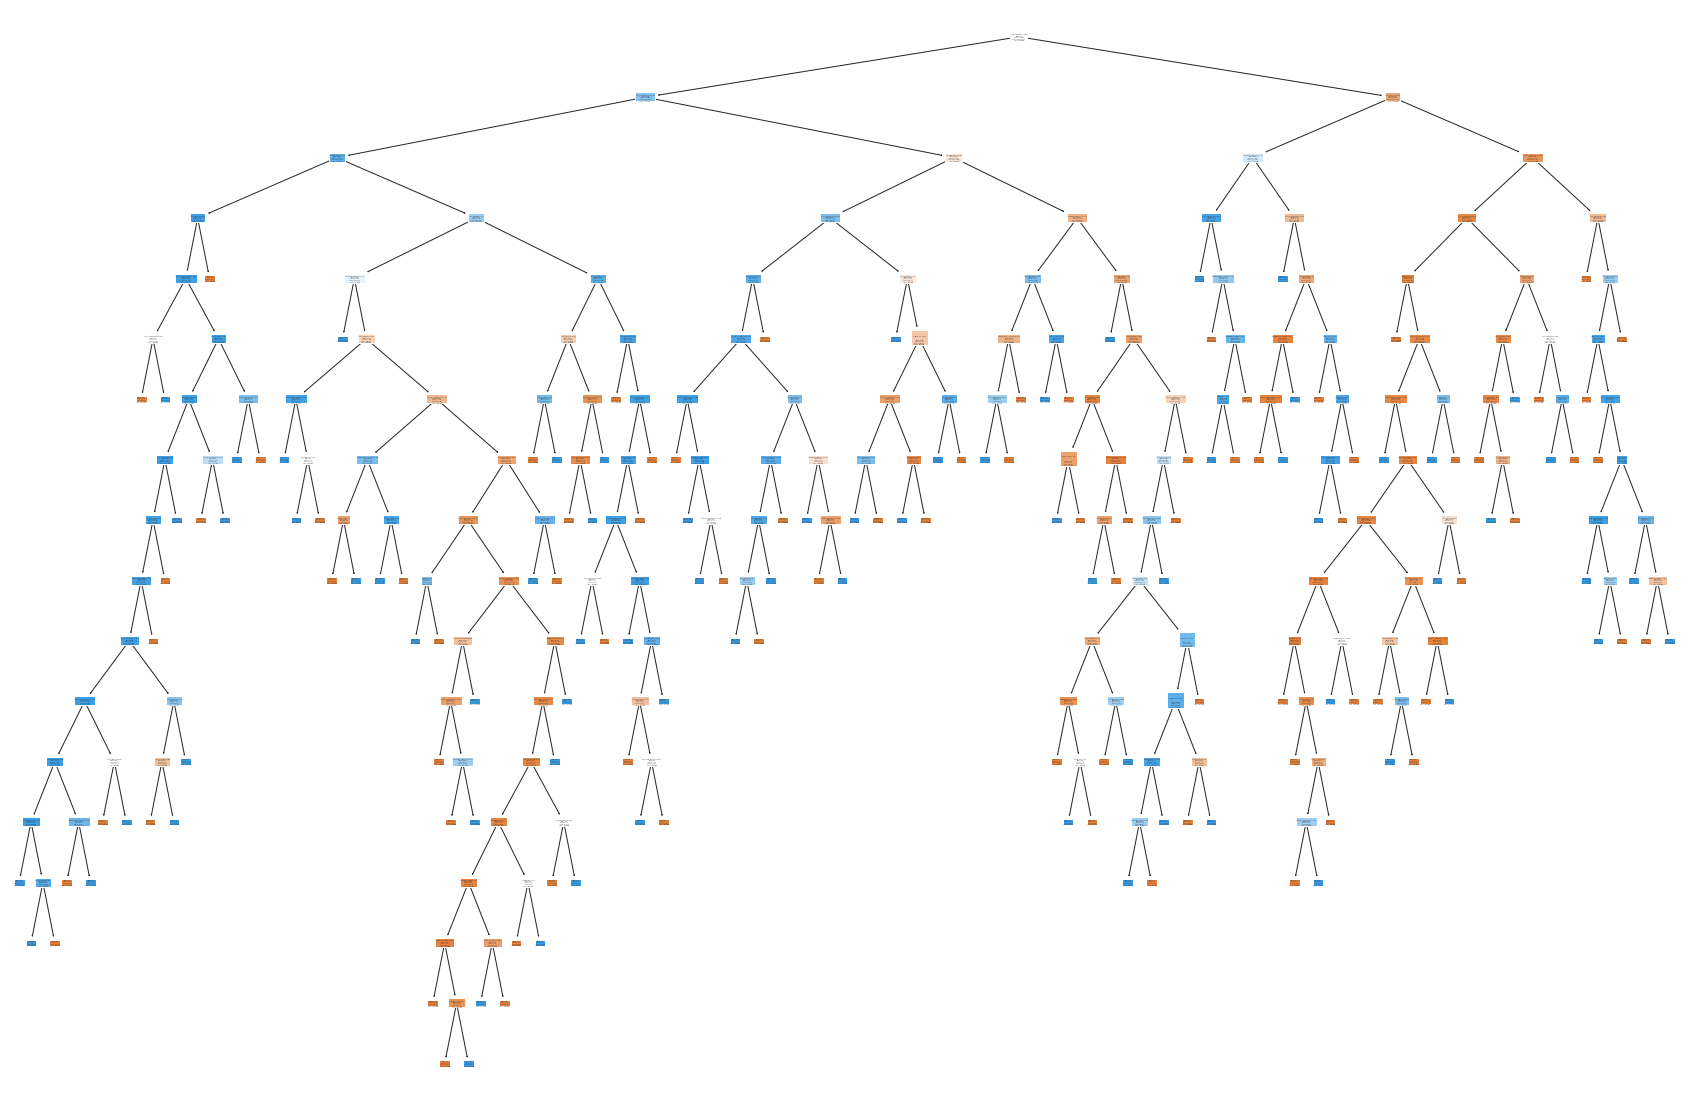

In [40]:
from sklearn import tree
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(model[1], 
                   feature_names=total_list,  
                   class_names=["Existing", "Attrited"],
                   filled=True)

#### Precision - Recall Curve

In [41]:
precisions, recalls, thresholds = precision_recall_curve(pred_test_init, y_test_init)

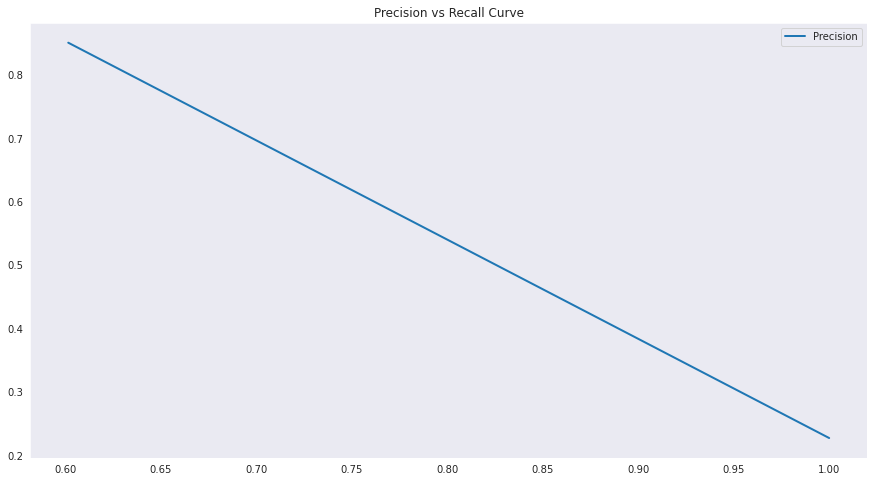

In [42]:
plt.figure(figsize = (15,8))
sns.lineplot(x = recalls[:-1], y = precisions[:-1], markers = "b--", label="Precision", linewidth=2)
plt.title("Precision vs Recall Curve")
#plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
[...]  # beautify the figure: add grid, legend, axis, labels, and circles
plt.show();

#### ROC Curve/ROC AUC Score

In [43]:
roc_auc_score(y_test_init, pred_test_init)

0.8712432386747803

In [44]:
fpr, tpr, thresholds = roc_curve(y_test_init, pred_test_init)

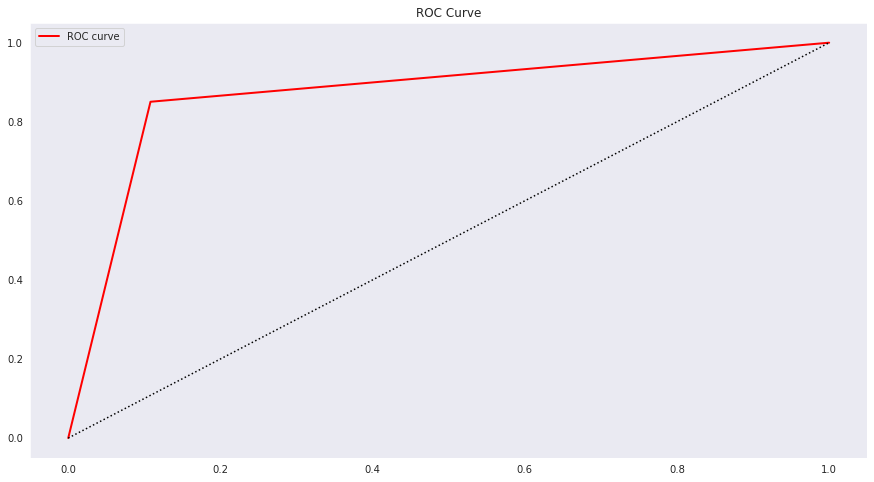

In [45]:
plt.figure(figsize = (15,8))
sns.lineplot(x = fpr, y = tpr, linewidth=2, label="ROC curve", color = "red")
plt.plot([0, 1], [0, 1], 'k:')
plt.title("ROC Curve")
plt.show()

#### Feature Importance

In [46]:
vip = model.steps[1][1].feature_importances_
vip

array([0.00000000e+00, 1.69388409e-03, 0.00000000e+00, 9.60614793e-04,
       0.00000000e+00, 3.13343397e-03, 1.23715542e-03, 1.53698367e-03,
       9.60614793e-04, 0.00000000e+00, 1.44092219e-03, 1.72910663e-03,
       6.29296868e-03, 2.52379705e-03, 1.53698367e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.44092219e-03, 0.00000000e+00,
       5.56451257e-04, 0.00000000e+00, 1.69910848e-03, 9.07138280e-04,
       8.90824737e-04, 0.00000000e+00, 0.00000000e+00, 1.77680149e-03,
       9.86193105e-04, 1.54613238e-03, 1.85554652e-03, 4.58475242e-03,
       0.00000000e+00, 6.08914295e-04, 2.11044159e-04, 0.00000000e+00,
       1.65497579e-03, 3.05117170e-04, 0.00000000e+00, 1.84572863e-03,
       0.00000000e+00, 0.00000000e+00, 9.26909011e-04, 0.00000000e+00,
       1.41472360e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.22767855e-02, 1.68107589e-03, 2.23515599e-03,
       7.37543482e-02, 1.08697106e-02, 1.17377653e-02, 1.36242890e-02,
      

In [47]:
model.steps[0][1].transformers_[0][1].get_feature_names()

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_College', 'x0_Doctorate', 'x0_Graduate', 'x0_High School',
       'x0_Post-Graduate', 'x0_Uneducated', 'x0_Unknown', 'x1_Divorced',
       'x1_Married', 'x1_Single', 'x1_Unknown', 'x2_$120K +',
       'x2_$40K - $60K', 'x2_$60K - $80K', 'x2_$80K - $120K',
       'x2_Less than $40K', 'x2_Unknown', 'x3_Blue', 'x3_Gold',
       'x3_Platinum', 'x3_Silver', 'x4_Divorced_College',
       'x4_Divorced_Doctorate', 'x4_Divorced_Graduate',
       'x4_Divorced_High School', 'x4_Divorced_Post-Graduate',
       'x4_Divorced_Uneducated', 'x4_Divorced_Unknown',
       'x4_Married_College', 'x4_Married_Doctorate',
       'x4_Married_Graduate', 'x4_Married_High School',
       'x4_Married_Post-Graduate', 'x4_Married_Uneducated',
       'x4_Married_Unknown', 'x4_Single_College', 'x4_Single_Doctorate',
       'x4_Single_Graduate', 'x4_Single_High School',
       'x4_Single_Post-Graduate', 'x4_Single_Uneducated',
       'x4_Single_Unknown', 'x4_Unknown_College', 'x4_Unknown_Doctorate',
       '

In [48]:
features = pd.DataFrame({'feat_names':list(model.steps[0][1].transformers_[0][1].get_feature_names()) + num, 'vip': vip})

features = features.assign(magnitude = abs(features['vip']), sign = np.sign(features['vip']))

features = features.set_index('feat_names').sort_values(by='magnitude', ascending=False)
features.head(10)

,vip,magnitude,sign
feat_names,,,
total_trans_amt,0.396054,0.396054,1.0
total_trans_ct,0.137337,0.137337,1.0
total_ct_chng_q4_q1,0.107977,0.107977,1.0
revolving_trans,0.076450,0.076450,1.0
total_relationship_count,0.073754,0.073754,1.0
total_amt_chng_q4_q1,0.060448,0.060448,1.0
customer_age,0.032277,0.032277,1.0
total_revolving_bal,0.014904,0.014904,1.0
credit_limit,0.013624,0.013624,1.0


/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


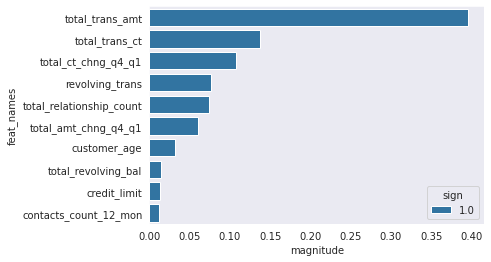

In [49]:
sns.barplot(y=features.index[:10], x='magnitude', hue='sign', data=features[:10], orient='h', dodge=False);

In [50]:
len(features[features["vip"] > 0])

43

#### Holdout test data results

In [51]:
pred_test = model.predict(x_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1701
           1       0.59      0.90      0.71       325

    accuracy                           0.88      2026
   macro avg       0.78      0.89      0.82      2026
weighted avg       0.92      0.88      0.89      2026



<AxesSubplot:>

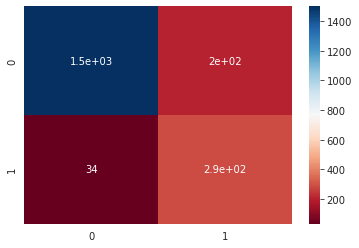

In [52]:
conf = confusion_matrix(y_test, pred_test)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [53]:
test["prediction"] = pred_test
test_probs = model.predict_proba(x_test)
test["prob_0"], test["prob_1"] = test_probs[:,0], test_probs[:,1]
test.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education,prediction,prob_0,prob_1
3933,815240358,0,47,F,3,Uneducated,Married,Unknown,Blue,42,...,1.063,3357,62,0.771,0.060,0.447125,Married_Uneducated,0,1.0,0.0
2790,779284833,0,55,M,2,Post-Graduate,Single,$60K - $80K,Blue,37,...,0.758,3591,63,0.750,0.081,0.500975,Single_Post-Graduate,1,0.0,1.0
8663,719658858,0,50,F,4,Doctorate,Married,Unknown,Silver,36,...,0.666,7042,73,0.553,0.061,0.297643,Married_Doctorate,0,1.0,0.0
731,719459358,0,52,M,1,Doctorate,Married,$120K +,Blue,41,...,1.219,1751,48,0.920,0.029,0.564820,Married_Doctorate,0,1.0,0.0
3335,734924658,0,47,F,5,High School,Married,Less than $40K,Blue,36,...,0.873,4123,67,0.489,0.536,0.192093,Married_High School,0,1.0,0.0


#### ROC Curve/ROC AUC Score

In [54]:
roc_auc_score(y_test, pred_test)

0.8883154705376927

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

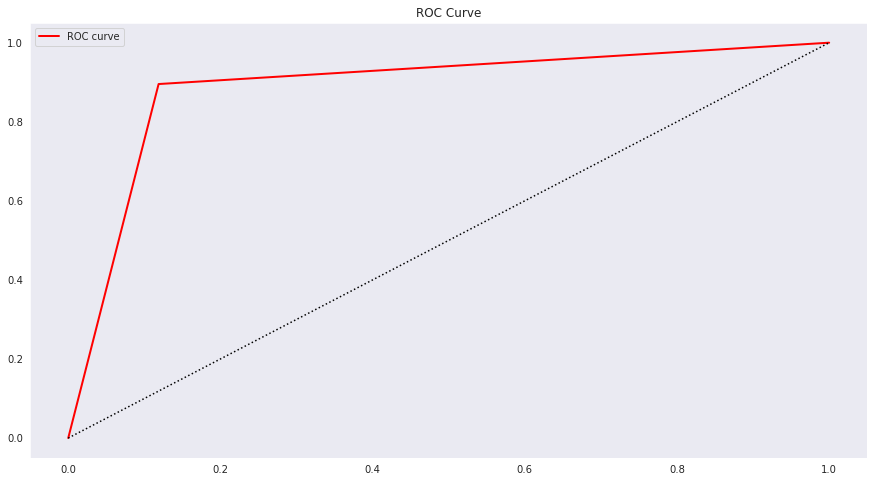

In [56]:
plt.figure(figsize = (15,8))
sns.lineplot(x = fpr, y = tpr, linewidth=2, label="ROC curve", color = "red")
plt.plot([0, 1], [0, 1], 'k:')
plt.title("ROC Curve")
plt.show()